# Figure 2 from Bai et al., 2023 - GRL

This example code goes through the basic functions to make the 2D conditional mean plots. Data needed is ocean surface vorticity, ocean surface horizontal divergence, crosswind SST gradients, downwind SST gradients, wind stress curl, wind stress divergence, and Coriolis parameter $f$ for normalization. The above data are stored in the format A(nt,ny,nx).

In [1]:
import numpy as np
import pylab as plt
import sys,glob
import matplotlib as mpl
import matplotlib.colors as colors
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
import cmocean
import matplotlib.ticker

Define the function that calculates the mean values of points within 1 standard deviation of mean in each bin:

In [2]:
def myfunc_1std(values):
    std = np.nanstd(values)
    new_val = values[(values<np.nanmean(values)+std) & (values>np.nanmean(values)-std)]
    output = np.nanmean(new_val)
    return output

Define bins sizes for normalized SST gradients and normalized vorticity/divergence (functional form is shown in SI):

In [3]:
sstbin =  [-80,-76,-72,-68,-64,-60,-56,-52,-48,-44,-40,-36,-32,-28,-24,-20,-16,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,16,20,24,28,32,36,40,44,48,52,56,60,64,68,72,76,80]
sstbinrange = [i*1/10 for i in sstbin]
vortbin = [-50,-45,-40,-35,-30,-25,-20,-18,-16,-14,-12,-10,-8,-6,-4,-3,-2,-1,0,1,2,3,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50]
vortbinrange = [i*1/10 for i in vortbin]

In [4]:
# for plotting simplicity, change the bin limits from lists to arrays 
xedges = np.array(sstbinrange)
yedges = np.array(vortbinrange)
XX,YY = np.meshgrid(xedges,yedges)

# calculate bin centers 
x_centers = (xedges[:-1] + xedges[1:]) / 2
y_centers = (yedges[:-1] + yedges[1:]) / 2
num_xbins = len(xedges) - 1
num_ybins = len(yedges) - 1


Example 2D binned statistics: 

In [5]:
# # define size the 2D binned results 
# crosswind_vort_curl = np.zeros((int(len(sstbinrange))-1,int(len(vortbinrange))-1))

# # flatten corresponding 
# xc = np.array(crosswind[:,:,:].ravel())
# ye = np.array((-vort[:,:,:]/ff[:,:]).ravel())
# ze = np.array(curl[:,:,:].ravel())
# crosswind_vort_curl,xedges,yedges,_ = binned_statistic_2d(xc*1e4,ye,ze1*1e4,statistic=myfunc_1std,bins=[sstbinrange,vortbinrange])


# # repeat the 2D binned statistics for all combinations of current and thermal feedback and the corresponding
# # wind stress derivatives 

Import calculated 2D binned statictics: 

In [6]:
# all binned conbinations with ocean surface vorticity
data = np.load('./wind_sstvort_6257_JJA_update.npz')
downwind_vort_div = data['downwind_mean_raw_tt']# downwind SST gradient and ocean vorticity, wind stress divergence
crosswind_vort_div = data['crosswind_mean_raw_tt']
downwind_vort_curl = data['downwind_mean_fil_tt']
crosswind_vort_curl = data['crosswind_mean_fil_tt']
downwind_cnt = data['downwind_1std_raw_cnt']
crosswind_cnt = data['crosswind_1std_fil_cnt']
crosswind_vort_curl_err = data['crosswind_stderr_fil_tt']
downwind_vort_div_err = data['downwind_stderr_raw_tt']

# all binned conbinations with ocean surface divergence
data = np.load('./wind_sstdiv_6257_JJA_update.npz')
downwind_ocediv_div = data['downwind_mean_raw_tt']
crosswind_ocediv_div = data['crosswind_mean_raw_tt']
downwind_ocediv_curl = data['downwind_mean_fil_tt']
crosswind_ocediv_curl = data['crosswind_mean_fil_tt']
downwind_cnt_div = data['downwind_1std_raw_cnt']
crosswind_cnt_div = data['crosswind_1std_fil_cnt']
crosswind_ocediv_curl_err = data['crosswind_stderr_fil_tt']
downwind_ocediv_div_err = data['downwind_stderr_raw_tt']

Plotting:

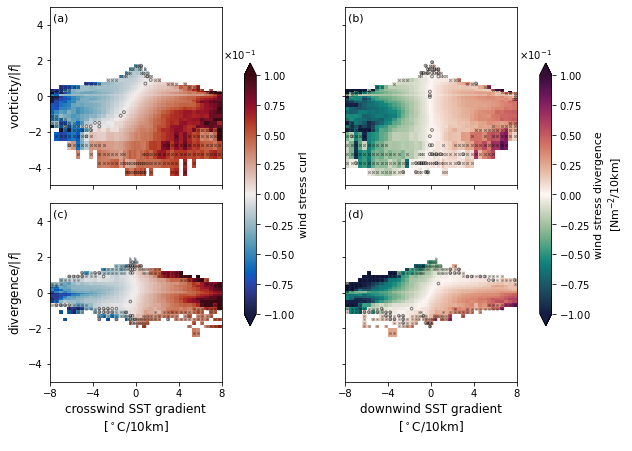

In [7]:
fig = plt.figure(figsize=(8.2,6.9))

# two subfigures, left and right, for wind stress curl and divergence
(subfig_l,subfig_r) = fig.subfigures(nrows=1,ncols=2,wspace=1.2) 

# left subfigure 
axes_l = subfig_l.subplots(nrows=2,ncols=1,sharex=True)
plt.subplots_adjust(hspace=0.1)
two2map = crosswind_vort_curl
two2map = np.ma.masked_invalid(two2map) # mask NaN values
im = axes_l[0].pcolormesh(XX,YY,two2map.T,vmin=-0.1,vmax=0.1,cmap='cmo.balance',linewidth=0,rasterized=True)

# identify bins with less than 100 points in the average, mark with "x"; identify bins with standard error
# larger than mean, mark with "o"
for i in range(num_ybins):
    for j in range(num_xbins):
        if not np.isnan(crosswind_vort_curl[j,i]) and crosswind_cnt[j,i]<50:
            axes_l[0].plot(x_centers[j], y_centers[i], marker='x', color='k',alpha=0.4,markersize=2.5)
        if not np.isnan(crosswind_vort_curl[j,i]) and np.abs(crosswind_vort_curl[j,i])<np.abs(crosswind_vort_curl_err[j,i]):
            axes_l[0].scatter(x_centers[j], y_centers[i], s=8, facecolors='none', edgecolors='black',alpha=0.5)
axes_l[0].set_ylabel(r'vorticity/$|f|$',size=12)
axes_l[0].set_ylim(np.min(vortbinrange),np.max(vortbinrange))
axes_l[0].set_xlim(np.min(sstbinrange),np.max(sstbinrange))
axes_l[0].text(-7.7,4.2,s='(a)',fontsize=11)


two2map= crosswind_ocediv_curl
two2map = np.ma.masked_invalid(two2map)
im = axes_l[1].pcolormesh(XX,YY,two2map.T,vmin=-0.1,vmax=0.1,cmap='cmo.balance',linewidth=0,rasterized=True)
for i in range(num_ybins):
    for j in range(num_xbins):
        if not np.isnan(crosswind_ocediv_curl[j,i]) and crosswind_cnt_div[j,i]<50:
            axes_l[1].plot(x_centers[j], y_centers[i], marker='x', color='k',alpha=0.4,markersize=2)
        if not np.isnan(crosswind_ocediv_curl[j,i]) and np.abs(crosswind_ocediv_curl[j,i])<np.abs(crosswind_ocediv_curl_err[j,i]):
            axes_l[1].scatter(x_centers[j], y_centers[i], s=7, facecolors='none', edgecolors='black',alpha=0.5)
axes_l[1].set_xlabel(r'crosswind SST gradient'+'\n[$^\circ$C/10km]',fontsize=12)
axes_l[1].set_ylabel(r'divergence/$|f|$',size=12)
axes_l[1].set_ylim(np.min(vortbinrange),np.max(vortbinrange))
axes_l[1].set_xlim(np.min(sstbinrange),np.max(sstbinrange))
axes_l[1].set_xticks([-8,-4,0,4,8])
axes_l[1].text(-7.7,4.2,s='(c)',fontsize=11)#4.2


fmt = matplotlib.ticker.ScalarFormatter(useMathText = True)
fmt.set_powerlimits((0,0))
subfig_l.colorbar(im,ax=axes_l,shrink=0.7,extend='both',
                  format=fmt,pad=0.1).set_label('wind stress curl',size=11)



axes_r = subfig_r.subplots(nrows=2,ncols=1,sharex=True)
two2map = downwind_vort_div
two2map = np.ma.masked_invalid(two2map)
im = axes_r[0].pcolormesh(XX,YY,two2map.T,vmin=-0.1,vmax=0.1,cmap='cmo.curl',linewidth=0,rasterized=True) # raw as for divergence, use curl as cmp
for i in range(num_ybins):
    for j in range(num_xbins):
        if not np.isnan(downwind_vort_div[j,i]) and downwind_cnt[j,i]<50:
            axes_r[0].plot(x_centers[j], y_centers[i], marker='x', color='k',alpha=0.4,markersize=2.5)
        if not np.isnan(downwind_vort_div[j,i]) and np.abs(downwind_vort_div[j,i])<np.abs(downwind_vort_div_err[j,i]):
            axes_r[0].scatter(x_centers[j], y_centers[i], s=8, facecolors='none', edgecolors='black',alpha=0.5)
axes_r[0].set_ylim(np.min(vortbinrange),np.max(vortbinrange))
axes_r[0].set_xlim(np.min(sstbinrange),np.max(sstbinrange))
axes_r[0].tick_params(labelleft=False)
axes_r[0].text(-7.7,4.2,s='(b)',fontsize=11)


two2map = downwind_ocediv_div
two2map = np.ma.masked_invalid(two2map)
im = axes_r[1].pcolormesh(XX,YY,two2map.T,vmin=-0.1,vmax=0.1,cmap='cmo.curl',linewidth=0,rasterized=True)
for i in range(num_ybins):
    for j in range(num_xbins):
        if not np.isnan(downwind_ocediv_div[j,i]) and downwind_cnt_div[j,i]<50:
            axes_r[1].plot(x_centers[j], y_centers[i], marker='x', color='k',alpha=0.4,markersize=2)
        if not np.isnan(downwind_ocediv_div[j,i]) and np.abs(downwind_ocediv_div[j,i])<np.abs(downwind_ocediv_div_err[j,i]):
            axes_r[1].scatter(x_centers[j], y_centers[i], s=7, facecolors='none', edgecolors='black',alpha=0.5)
axes_r[1].set_xlabel(r'downwind SST gradient'+'\n[$^\circ$C/10km]',fontsize=12)
axes_r[1].set_ylim(np.min(vortbinrange),np.max(vortbinrange))
axes_r[1].set_xlim(np.min(sstbinrange),np.max(sstbinrange))
axes_r[1].tick_params(labelleft=False)
axes_r[1].set_xticks([-8,-4,0,4,8])
axes_r[1].text(-7.7,4.2,s='(d)',fontsize=11) # 4.2


cbar = subfig_r.colorbar(im, ax=axes_r,shrink=0.7,extend='both',
                         format=fmt,pad=0.1).set_label('wind stress divergence\n[Nm$^{-2}$/10km]',size=11)


plt.savefig('./fig2.png',dpi=400,bbox_inches='tight')
plt.savefig('./fig2.pdf',dpi=400,bbox_inches='tight')